# Background Case

## Introduction and Objective case

Introduction :
Revoubank is a European Bank that provides credit cards to customers. Revoubank wants to increase credit card usage in various merchants and partnerships. They want to know the credit cards usage in one of their partners is Revoshop

The dataset containts more information about behaviour customer

objective :
Identify customer behavior based on customer segmentation. By understanding the influence of existing promotions on all sales. we can take action to focus on customers who are very sensitive to promos so that promos can be adjusted to the existing budget and are right on target.
On the other hand, understanding the effect of promotion on sales can also focus on customers who are not sensitive to promos so that the promos issued can be adjusted accordingly.

#Dataset Prepartion

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

##DATA IMPORT

In [ ]:
#import dataset from drive

potter_url ='https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view'
potter_data = 'https://drive.google.com/uc?id=' + potter_url.split ('/')[-2]

print (potter_data)


https://drive.google.com/uc?id=1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe


In [ ]:
df_data_bank = pd.read_csv (potter_data)
df_data_bank.head() #check the data from top 5

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df_data_bank.info()  #check data type and data null, we find column birthdate is not datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

Data Dictionary :     
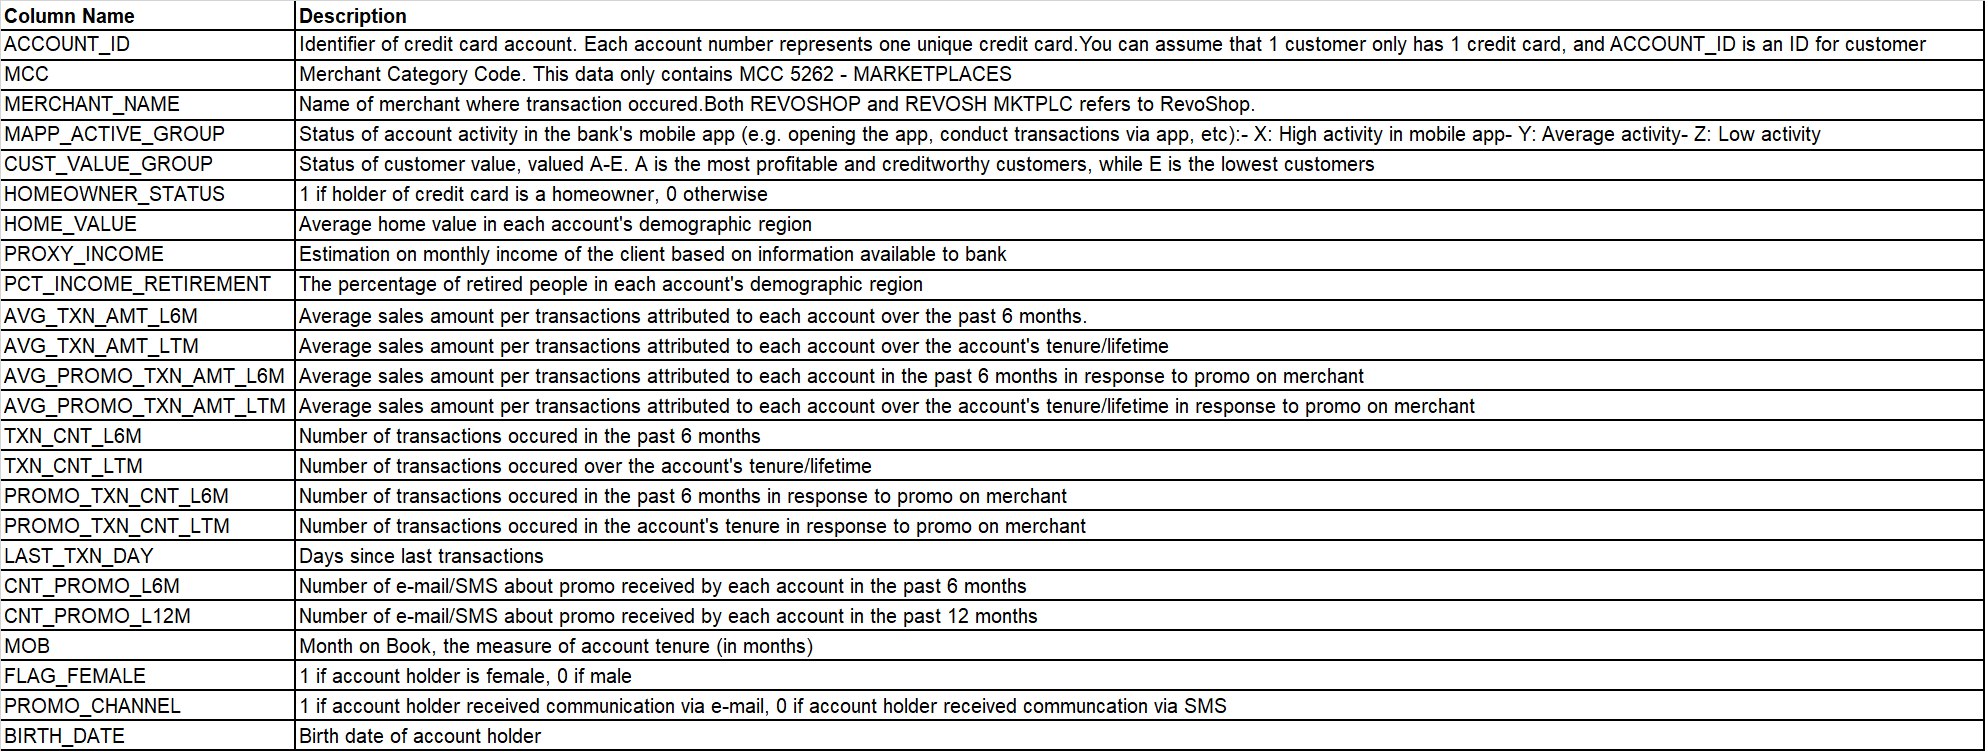

## DATA CLEANING

Step :
* Check Missing value (value have -1)
* Check Duplicates
* Check Typos
* Check Data types

In [ ]:
df_dataclean = df_data_bank.copy ()

In [ ]:
df_dataclean.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df_dataclean.shape
print ("Row :",df_dataclean.shape[0])
print ("col :",df_dataclean.shape[1])

Row : 112634
col : 24


In [ ]:
df_dataclean.isnull().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

In [ ]:
for col in df_dataclean.columns:
  print(col)
  print(df_dataclean[col].value_counts())
  print('\n')

ACCOUNT_ID
100070125    2
100502294    2
100771163    2
100376790    2
100950065    2
            ..
100356812    1
100356810    1
100356795    1
100356780    1
101059869    1
Name: ACCOUNT_ID, Length: 112433, dtype: int64


MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64


AVG_TXN_AMT_L6M
100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: AVG_TXN_AMT_L6M, Length: 1033, dtype: int64


AVG_TXN_AMT_LTM
100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: AVG_TXN_AMT_LTM, Length: 2353, dtype: int64


AVG_PROMO_TXN_AMT_L6M
100.0    17677
50.0      6476
150.0     5958
120.0     4103
200

Insight or Statement :

- based on unique values for all coloumns, finds 0 value in Proxy income coloumns and Home_value. We assume the user do not fill the proxy income and home_value. for a while we keep two coloumns.

- we are going to remove Departement store on MCC Coloumns becase the value only 1 and in coloumns Merchant_name we are going to remove EL corte ingles and toktoklive. We assume the analysis for the marketplace revoshop

- There is 0 value on CNT_Promo_L6M, we keep it that value because the meaning is the user do not get promo by email and SMS

- There is 0 Value on homeowner , flag female,  promo channel but every 0 value in each coloumns have a meaning. 0 value on homeowner refer to 'otherwise', flag female 0 value refer to 'male' and 0 value in promo channel refer to SMS

- There is typos on Merchant_Name, because Revos MP refes to Revoshop


###Missing value

In [ ]:
df_dataclean.count()

ACCOUNT_ID               112634
MCC                      112634
MERCHANT_NAME            112634
AVG_TXN_AMT_L6M          112634
AVG_TXN_AMT_LTM          112634
AVG_PROMO_TXN_AMT_L6M    112634
AVG_PROMO_TXN_AMT_LTM    112634
TXN_CNT_L6M              112634
TXN_CNT_LTM              112634
PROMO_TXN_CNT_L6M        112634
PROMO_TXN_CNT_LTM        112634
LAST_TXN_DAY             112634
CNT_PROMO_L6M            112634
CNT_PROMO_L12M           112634
CUST_VALUE_GROUP         112634
MAPP_ACTIVE_GROUP        112634
HOMEOWNER_STATUS         112634
HOME_VALUE               112634
PROXY_INCOME             112634
PCT_INCOME_RETIREMENT    112634
MOB                      112634
FLAG_FEMALE              112634
PROMO_CHANNEL            112634
BIRTH_DATE               112634
dtype: int64

In [ ]:
df_dataclean[df_dataclean['AVG_PROMO_TXN_AMT_L6M'] == -1].count()

ACCOUNT_ID               3516
MCC                      3516
MERCHANT_NAME            3516
AVG_TXN_AMT_L6M          3516
AVG_TXN_AMT_LTM          3516
AVG_PROMO_TXN_AMT_L6M    3516
AVG_PROMO_TXN_AMT_LTM    3516
TXN_CNT_L6M              3516
TXN_CNT_LTM              3516
PROMO_TXN_CNT_L6M        3516
PROMO_TXN_CNT_LTM        3516
LAST_TXN_DAY             3516
CNT_PROMO_L6M            3516
CNT_PROMO_L12M           3516
CUST_VALUE_GROUP         3516
MAPP_ACTIVE_GROUP        3516
HOMEOWNER_STATUS         3516
HOME_VALUE               3516
PROXY_INCOME             3516
PCT_INCOME_RETIREMENT    3516
MOB                      3516
FLAG_FEMALE              3516
PROMO_CHANNEL            3516
BIRTH_DATE               3516
dtype: int64

In [ ]:
(3516/112634)*100

3.1216151428520695

- in 'AVG_PROMO_TXN_AMT_L6M' there is 3516 missing value, we decide to remove that missing value to make the result of analyst not bias. there's only 3% from the date we're going to remove



In [ ]:
df_dataclean = df_dataclean [df_dataclean['AVG_PROMO_TXN_AMT_L6M'] != -1]

In [ ]:
df_dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109118 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             109118 non-null  int64  
 1   MCC                    109118 non-null  object 
 2   MERCHANT_NAME          109118 non-null  object 
 3   AVG_TXN_AMT_L6M        109118 non-null  float64
 4   AVG_TXN_AMT_LTM        109118 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  109118 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  109118 non-null  float64
 7   TXN_CNT_L6M            109118 non-null  float64
 8   TXN_CNT_LTM            109118 non-null  float64
 9   PROMO_TXN_CNT_L6M      109118 non-null  float64
 10  PROMO_TXN_CNT_LTM      109118 non-null  float64
 11  LAST_TXN_DAY           109118 non-null  float64
 12  CNT_PROMO_L6M          109118 non-null  float64
 13  CNT_PROMO_L12M         109118 non-null  float64
 14  CUST_VALUE_GROUP       109118 non-nu

There is no -1 in AVG_PROMO_TXN_AMT_L6M, the missing data has been dropped

###Drop Coloumns, typos and Replace Type

####Replace

In [ ]:
df_dataclean['ACCOUNT_ID'] = df_dataclean['ACCOUNT_ID'].astype(str)
df_dataclean['BIRTH_DATE'] = pd.to_datetime(df_dataclean['BIRTH_DATE'])

In [ ]:
df_dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109118 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             109118 non-null  object        
 1   MCC                    109118 non-null  object        
 2   MERCHANT_NAME          109118 non-null  object        
 3   AVG_TXN_AMT_L6M        109118 non-null  float64       
 4   AVG_TXN_AMT_LTM        109118 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  109118 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  109118 non-null  float64       
 7   TXN_CNT_L6M            109118 non-null  float64       
 8   TXN_CNT_LTM            109118 non-null  float64       
 9   PROMO_TXN_CNT_L6M      109118 non-null  float64       
 10  PROMO_TXN_CNT_LTM      109118 non-null  float64       
 11  LAST_TXN_DAY           109118 non-null  float64       
 12  CNT_PROMO_L6M          109118 non-null  floa

In [ ]:
df_dataclean ['MERCHANT_NAME'].value_counts()

REVOSHOP           88319
REVOSH MKTPLC      19339
TOKTOKLIVE          1459
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64

THERE IS A TYPOS FOR REVOSH MKTPLC, THAT VALUES REFER TO REVOSHOP

In [ ]:
df_dataclean ['MERCHANT_NAME'].replace ({"REVOSH MKTPLC" : "REVOSHOP"},inplace = True)

In [ ]:
df_dataclean ['MERCHANT_NAME'].value_counts()

REVOSHOP           107658
TOKTOKLIVE           1459
EL CORTE INGLES         1
Name: MERCHANT_NAME, dtype: int64

REVOSH MKTPLC HAS BEEN CHANGED TO REVOSHOP

####IRRELEVANTS VALUE

In [ ]:
df_dataclean[df_dataclean['MERCHANT_NAME'] != 'REVOSHOP'].count()

ACCOUNT_ID               1460
MCC                      1460
MERCHANT_NAME            1460
AVG_TXN_AMT_L6M          1460
AVG_TXN_AMT_LTM          1460
AVG_PROMO_TXN_AMT_L6M    1460
AVG_PROMO_TXN_AMT_LTM    1460
TXN_CNT_L6M              1460
TXN_CNT_LTM              1460
PROMO_TXN_CNT_L6M        1460
PROMO_TXN_CNT_LTM        1460
LAST_TXN_DAY             1460
CNT_PROMO_L6M            1460
CNT_PROMO_L12M           1460
CUST_VALUE_GROUP         1460
MAPP_ACTIVE_GROUP        1460
HOMEOWNER_STATUS         1460
HOME_VALUE               1460
PROXY_INCOME             1460
PCT_INCOME_RETIREMENT    1460
MOB                      1460
FLAG_FEMALE              1460
PROMO_CHANNEL            1460
BIRTH_DATE               1460
dtype: int64

THERE IS 1460 transaction who has been in another Merchant, because we want to know Promo in Revoshop, so we decide to drop another merchant form the data

In [ ]:
df_dataclean = df_dataclean [df_dataclean['MERCHANT_NAME'] == "REVOSHOP"]

In [ ]:
df_dataclean['MERCHANT_NAME'].value_counts()

REVOSHOP    107658
Name: MERCHANT_NAME, dtype: int64

In [ ]:
df_dataclean[df_dataclean['ACCOUNT_ID'].duplicated(keep=False)].head(20)

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df_dataclean[df_dataclean['ACCOUNT_ID'].duplicated(keep=False)].nunique()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

There is no duplicated data and data is only Revoshop in merchant name

####Drop Columns and irrelevants columns

In [ ]:
df_dataclean[df_dataclean.columns[18]].value_counts()

0.0        26259
39240.0       30
36989.0       26
39241.0       26
48514.0       25
           ...  
59532.0        1
36288.0        1
82490.0        1
51202.0        1
25376.0        1
Name: PROXY_INCOME, Length: 25609, dtype: int64

In [ ]:
df_dataclean[df_dataclean.columns[16]].value_counts()

1.0    56916
0.0    50742
Name: HOMEOWNER_STATUS, dtype: int64

In [ ]:
df_dataclean[df_dataclean.columns[19]].value_counts()

32.0     4896
31.0     4670
30.0     4655
33.0     4621
29.0     4550
         ... 
100.0       3
85.0        1
81.0        1
88.0        1
84.0        1
Name: PCT_INCOME_RETIREMENT, Length: 89, dtype: int64

In [ ]:
df_dataclean[df_dataclean.columns[17]].value_counts()

0.0        1137
42503.0      12
87501.0      12
70600.0      11
94400.0      11
           ... 
15615.0       1
64895.0       1
24677.0       1
28816.0       1
26302.0       1
Name: HOME_VALUE, Length: 63864, dtype: int64

because the value 0 in columns proxy_incom, and home_value that can not define, so we decide to drop the columns. the other else we drop pc_income_retire and homeowner stat because irrelevants value with the objective analysis

In [ ]:
df_dataclean.columns

Index(['ACCOUNT_ID', 'MCC', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M',
       'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM',
       'TXN_CNT_L6M', 'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM',
       'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS', 'HOME_VALUE', 'PROXY_INCOME',
       'PCT_INCOME_RETIREMENT', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

In [ ]:
df_dataclean.drop(columns = 'PROXY_INCOME', inplace = True)

In [ ]:
df_dataclean.drop(columns = 'HOME_VALUE', inplace = True)

In [ ]:
df_dataclean.drop(columns = 'PCT_INCOME_RETIREMENT', inplace = True)

In [ ]:
df_dataclean.drop(columns = 'HOMEOWNER_STATUS', inplace = True)

In [ ]:
df_dataclean.columns

Index(['ACCOUNT_ID', 'MCC', 'MERCHANT_NAME', 'AVG_TXN_AMT_L6M',
       'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM',
       'TXN_CNT_L6M', 'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM',
       'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M', 'CUST_VALUE_GROUP',
       'MAPP_ACTIVE_GROUP', 'MOB', 'FLAG_FEMALE', 'PROMO_CHANNEL',
       'BIRTH_DATE'],
      dtype='object')

Proxy income and home value successfuly dropped

In [ ]:
df_dataclean ['MCC'].unique()

array(['5262-MARKETPLACES'], dtype=object)

In [ ]:
df_dataclean.drop(columns = 'MCC', inplace = True)

In [ ]:
df_dataclean.columns.to_list()

['ACCOUNT_ID',
 'MERCHANT_NAME',
 'AVG_TXN_AMT_L6M',
 'AVG_TXN_AMT_LTM',
 'AVG_PROMO_TXN_AMT_L6M',
 'AVG_PROMO_TXN_AMT_LTM',
 'TXN_CNT_L6M',
 'TXN_CNT_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM',
 'LAST_TXN_DAY',
 'CNT_PROMO_L6M',
 'CNT_PROMO_L12M',
 'CUST_VALUE_GROUP',
 'MAPP_ACTIVE_GROUP',
 'MOB',
 'FLAG_FEMALE',
 'PROMO_CHANNEL',
 'BIRTH_DATE']

We decide remove MCC, because MCC can refers to Merchant_name and Mcc has only 1 value 'marketplace'. so we decide remove MCC columns

####Replace another columns

In [ ]:
df_dataclean ['FLAG_FEMALE'].replace ({
    0 : "MALE",
    1 : "FEMALE"
    },inplace = True)

In [ ]:
df_dataclean['PROMO_CHANNEL'].replace ({
    0 : "SMS",
    1 : "EMAIL"
    },inplace = True)

In [ ]:
df_dataclean ['FLAG_FEMALE'].value_counts()

FEMALE    63035
MALE      44623
Name: FLAG_FEMALE, dtype: int64

In [ ]:
df_dataclean ['PROMO_CHANNEL'].value_counts()

SMS      75299
EMAIL    32359
Name: PROMO_CHANNEL, dtype: int64

We decide replace flag_female amd Promo_channel from number become string like female or name because the columns not represent for number, the columns represent gender that define with numbers so, we decide to change to female or male

In [ ]:
df_dataclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

##PROMO

#### 4. Column identify promo - sensitify customers

###CATEGORY PROMO SENSITIVITY

In [ ]:
df_dataclean2 = df_dataclean.copy()

In [ ]:
df_dataclean2 ['TOTAL_SALES_L6M'] = df_dataclean2 ['AVG_TXN_AMT_L6M']*df_dataclean ['TXN_CNT_L6M']

In [ ]:
df_dataclean2 ['TOTAL_SALES_LTM'] = df_dataclean2 ['AVG_TXN_AMT_LTM']*df_dataclean ['TXN_CNT_LTM']

In [ ]:
df_dataclean2 ['TOTAL_PROMO_SALES_L6M'] = df_dataclean2 ['AVG_PROMO_TXN_AMT_L6M']*df_dataclean ['PROMO_TXN_CNT_L6M']

In [ ]:
df_dataclean2 ['TOTAL_PROMO_SALES_LTM'] = df_dataclean2 ['AVG_PROMO_TXN_AMT_LTM']*df_dataclean ['PROMO_TXN_CNT_LTM']

In [ ]:
df_dataclean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

#### Promo sensitive L6M

In [ ]:
df_dataclean2 ['PROMO_SENSITIF_L6M'] = df_dataclean2['TOTAL_PROMO_SALES_L6M']/df_dataclean2['TOTAL_SALES_L6M']*100

In [ ]:
a = df_dataclean2['PROMO_SENSITIF_L6M']

In [ ]:
df_dataclean2.loc[(a  >= 50),'Status_L6M'] = 'Sensitive'
df_dataclean2.loc[(a  < 50),'Status_L6M'] = 'Not Sensitive'

In [ ]:
df_dataclean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

In [ ]:
df_dataclean2['Status_L6M'].value_counts()

Sensitive        78241
Not Sensitive    29417
Name: Status_L6M, dtype: int64

In [ ]:
#Sensitive
(78241/109117)*100



71.70376751560252

In [ ]:
#Not Sensitive
(29417/109117)*100

26.95913560673406

Insight :

Based on past 6 Month, there is 71% user sensitive to Promo and 26% user not Sensitive. So, for 6 months the promo gets attention from the user.
We can make some promo to 26% user to increase their transaction or we can focus to 71% untill their make continue using credit card for payment on marketplace

#### Promo sensitive LTM

In [ ]:
df_dataclean2 ['PROMO_SENSITIF_LTM'] = df_dataclean2['TOTAL_PROMO_SALES_LTM']/df_dataclean2['TOTAL_SALES_LTM']*100

In [ ]:
df_dataclean2 ['PROMO_SENSITIF_LTM'].unique()

array([41.45936982, 59.75619473, 39.82969372, ..., 91.16616722,
       62.71440823, 40.08337342])

In [ ]:
b = df_dataclean2['PROMO_SENSITIF_LTM']

In [ ]:
df_dataclean2.loc[(b  >= 50),'Status_LTM'] = 'Sensitive'
df_dataclean2.loc[(b  < 50),'Status_LTM'] = 'Not Sensitive'

In [ ]:
df_dataclean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

In [ ]:
df_dataclean2['Status_LTM'].value_counts()

Sensitive        73806
Not Sensitive    33852
Name: Status_LTM, dtype: int64

In [ ]:
# Sensitive

((73806/109117)*100)

67.63932292859958

In [ ]:
# Not Sensitive

(33852/109117)*100

31.023580193737

Based on Lifetime account, There is 67.63% user who sensitive with promo and 31.02% not sensitive with promo. We can focus make promo for 31.02% to increase their transaction by credit cards or we can focusing promo to 67.63% user who sensitive with promo.

##Descriptive Stats

In [ ]:
df_datastat = df_dataclean2.copy()

In [ ]:
df_datastat.head()

,ACCOUNT_ID,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,...,PROMO_CHANNEL,BIRTH_DATE,TOTAL_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_L6M,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_L6M,Status_L6M,PROMO_SENSITIF_LTM,Status_LTM
0,100000004,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,...,SMS,1975-12-17,1080.0,4221.0,400.0,1750.0,37.0,Not Sensitive,41.5,Not Sensitive
1,100000008,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,...,SMS,1991-12-27,429.9,2510.2,280.0,1500.0,65.1,Sensitive,59.8,Sensitive
2,100000012,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,...,SMS,1970-03-22,1053.2,2912.4,800.0,1160.0,76.0,Sensitive,39.8,Not Sensitive
3,100000014,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,...,EMAIL,1983-11-26,1884.8,5670.0,1457.4,3900.0,77.3,Sensitive,68.8,Sensitive
4,100000015,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,...,SMS,1989-10-21,490.0,3410.0,390.0,1890.0,79.6,Sensitive,55.4,Sensitive


In [ ]:
df_datastat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

###0.Descriptive Question

1. How many revoshop customers in the data?
2. Demographics data set?
3. How much total sales have been generated in Revoshop (6Month)?
4. How many sales were made in response the promo last 6 month?
5. What percentage of total sales at Revoshop is attributed to the Promo? (6month)
6. What is the average number of transactions per customer in TLM and L6M?
7. Total cost of the promotion over the past 6 month?
8. Total revenue generated by the promo L6M?
9. How many customers ar considered promo - sensitive?

In [ ]:
df_datastat_number = df_datastat.select_dtypes(exclude = ['object','datetime'])
number1 = df_datastat_number.columns.to_list()
number1

['AVG_TXN_AMT_L6M',
 'AVG_TXN_AMT_LTM',
 'AVG_PROMO_TXN_AMT_L6M',
 'AVG_PROMO_TXN_AMT_LTM',
 'TXN_CNT_L6M',
 'TXN_CNT_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM',
 'LAST_TXN_DAY',
 'CNT_PROMO_L6M',
 'CNT_PROMO_L12M',
 'MOB',
 'TOTAL_SALES_L6M',
 'TOTAL_SALES_LTM',
 'TOTAL_PROMO_SALES_L6M',
 'TOTAL_PROMO_SALES_LTM',
 'PROMO_SENSITIF_L6M',
 'PROMO_SENSITIF_LTM']

In [ ]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df_datastat.describe()


,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,MOB,TOTAL_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_L6M,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_L6M,PROMO_SENSITIF_LTM
count,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0,107658.0
mean,126.8,106.8,125.7,119.8,4.5,20.2,2.8,10.4,18.3,5.7,14.4,101.2,526.1,2058.8,327.0,1212.2,63.5,60.2
std,79.8,75.3,80.4,76.6,2.3,9.0,1.7,4.4,4.1,1.4,6.0,25.6,378.3,1555.2,262.2,902.6,23.0,19.5
min,11.5,17.3,3.2,3.2,1.0,3.0,1.0,1.0,2.0,0.0,1.0,21.0,35.0,262.5,3.2,9.6,1.6,2.4
25%,83.3,69.3,80.0,80.0,3.0,14.0,1.0,7.0,16.0,5.0,12.0,81.0,300.0,1210.0,150.0,660.0,47.6,46.1
50%,108.0,92.6,104.3,100.0,4.0,18.0,2.0,10.0,18.0,6.0,13.0,105.0,430.0,1659.2,258.5,1000.0,62.6,59.7
75%,150.0,123.8,150.0,150.0,6.0,24.0,4.0,12.0,21.0,6.0,14.0,125.0,641.3,2430.4,405.0,1500.0,78.8,75.0
max,2000.0,3010.0,2000.0,2500.0,18.0,127.0,10.0,46.0,28.0,21.0,76.0,570.0,8500.0,52751.0,5400.0,25950.0,100.0,100.0


Insight :
1. AVG_TXN_AMT_L6M : The average is 126 usd, the median is 108 usd, max sales
   past 6 month is 2000 usd and the minimum sales past 6 month is 11.5 usd
2. AVG_TXN_AMT_LTM : average transaction amount for lifetime is 106.8 usd, the
   median is 92.6 usd, max transaction amount is 3010 and the min 17.3 usd
3. AVG_PROMO_TXN_AMT_L6M ; the average is 125 usd, median is 104 usd, max 2000
   usd and min 3.2 usd
4. AVG_PROMO_TXN_AMT_LTM ; the average is 119 usd, median is 100 usd, max 2500
   usd and min 3.2 usd

In [ ]:
df_datastat_object = df_datastat.select_dtypes(exclude = ['number','datetime'])
object1 = df_datastat_object.columns.to_list()
object1

['ACCOUNT_ID',
 'MERCHANT_NAME',
 'CUST_VALUE_GROUP',
 'MAPP_ACTIVE_GROUP',
 'FLAG_FEMALE',
 'PROMO_CHANNEL',
 'Status_L6M',
 'Status_LTM']

In [ ]:
df_datastat[object1].describe()

,ACCOUNT_ID,MERCHANT_NAME,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,FLAG_FEMALE,PROMO_CHANNEL,Status_L6M,Status_LTM
count,107658,107658,107658,107658,107658,107658,107658,107658
unique,107658,1,5,3,2,2,2,2
top,100000004,REVOSHOP,E,X,FEMALE,SMS,Sensitive,Sensitive
freq,1,107658,44537,100141,63035,75299,78241,73806


1. ACCOUNT_ID : have 107658 unique id, top 100000004
2. MERCHANT_NAME : top merchant revoshop, just 1 unique
3. CUST_VALUE_GROUP : top grup is E, have 5 unique
4. MAPP_ACTIVE_GROUP : top grup is X, have 3 unique
5. FLAG_FEMALE : top gender is Female, have 2 unique
6. Status_L6M : top is sensitive, have 2 unique
7. Status_LTM : top is sensitive, have 2 unique
8. Promo channel ; top SM, have 2 unique

In [ ]:
df_datastat[['BIRTH_DATE']].describe()

<ipython-input-226-08d1b73db97d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_datastat[['BIRTH_DATE']].describe()


,BIRTH_DATE
count,107658
unique,6761
top,1982-09-21 00:00:00
freq,57
first,1957-07-17 00:00:00
last,2005-09-20 00:00:00


first user birth 1957 - 07 -17  and the las 2005-09-20
have 6761 unique and have 57 frequence

### 1.How many revoshop customers in the data?

In [ ]:
df_datastat['ACCOUNT_ID'].nunique()

107658

In [ ]:
df_datastat['ACCOUNT_ID'].count()

107658

we have 107658 user

### 2.Customer *Demogrraph*

####User by Generations Age

In [ ]:
df_datastat['AGE'] = round((datetime(year=2023, month= 1, day=31) - df_datastat['BIRTH_DATE']) / np.timedelta64(1,'Y'))
df_datastat

,ACCOUNT_ID,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,...,BIRTH_DATE,TOTAL_SALES_L6M,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_L6M,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_L6M,Status_L6M,PROMO_SENSITIF_LTM,Status_LTM,AGE
0,100000004,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,...,1975-12-17,1080.0,4221.0,400.0,1750.0,37.0,Not Sensitive,41.5,Not Sensitive,47.0
1,100000008,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,...,1991-12-27,429.9,2510.2,280.0,1500.0,65.1,Sensitive,59.8,Sensitive,31.0
2,100000012,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,...,1970-03-22,1053.2,2912.4,800.0,1160.0,76.0,Sensitive,39.8,Not Sensitive,53.0
3,100000014,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,...,1983-11-26,1884.8,5670.0,1457.4,3900.0,77.3,Sensitive,68.8,Sensitive,39.0
4,100000015,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,...,1989-10-21,490.0,3410.0,390.0,1890.0,79.6,Sensitive,55.4,Sensitive,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,5.0,...,1979-05-24,200.0,1010.4,200.0,500.0,100.0,Sensitive,49.5,Not Sensitive,44.0
112629,101059843,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,5.0,...,1993-07-14,360.0,2494.8,120.0,1000.0,33.3,Not Sensitive,40.1,Not Sensitive,30.0
112630,101059857,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,12.0,...,1980-02-19,370.3,1030.4,140.1,840.0,37.8,Not Sensitive,81.5,Sensitive,43.0
112631,101059860,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,10.0,...,1986-12-29,585.0,3387.9,380.0,2000.0,65.0,Sensitive,59.0,Sensitive,36.0


In [ ]:
for cek_age in sorted(df_datastat['AGE'].unique()):
  print(cek_age)

17.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0


Based on Age of customer, we're going to gruping by generations

* 17 - 26 = Gen Z
* 27 - 42 = Millenials
* 43 - 58 = Gen X
* 58  above = Boomers

source : [Grouping Age by Generations Source](https://www.beresfordresearch.com/age-range-by-generation/)

In [ ]:
X = df_datastat['AGE']

In [ ]:
df_datastat.loc [(X >= 17), 'GROUP_AGE_GEN'] = 'GEN Z'
df_datastat.loc [(X >= 27), 'GROUP_AGE_GEN'] = 'MILLENIALS'
df_datastat.loc [(X >= 43), 'GROUP_AGE_GEN'] = 'GEN X'
df_datastat.loc [(X >= 58), 'GROUP_AGE_GEN'] = 'BOOMERS'




In [ ]:
df_datastat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

In [ ]:
df_datastat['GROUP_AGE_GEN'].value_counts()

MILLENIALS    68546
GEN X         38333
GEN Z           542
BOOMERS         237
Name: GROUP_AGE_GEN, dtype: int64

In [ ]:
GEN_AGE = df_datastat.groupby('GROUP_AGE_GEN')['ACCOUNT_ID'].count()
GEN_AGE = GEN_AGE.reset_index()
GEN_AGE

,GROUP_AGE_GEN,ACCOUNT_ID
0,BOOMERS,237
1,GEN X,38333
2,GEN Z,542
3,MILLENIALS,68546


<BarContainer object of 4 artists>

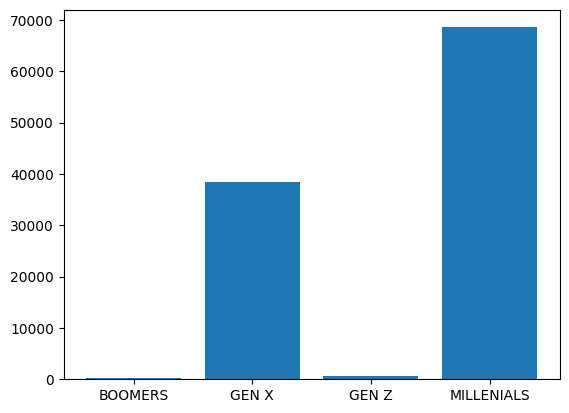

In [ ]:
plt.bar(GEN_AGE['GROUP_AGE_GEN'],GEN_AGE['ACCOUNT_ID'])

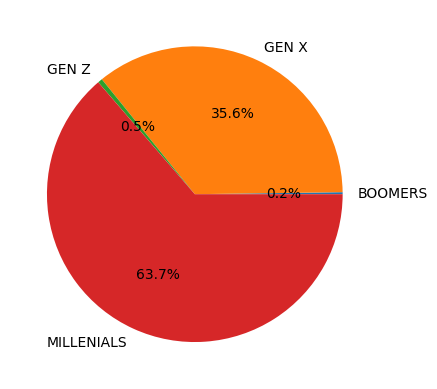

In [ ]:
plt.pie(GEN_AGE['ACCOUNT_ID'],labels = GEN_AGE['GROUP_AGE_GEN'], autopct ='%.1f%%')
plt.show()

Insight =
* Our user dominated by Millenials generation (27-42)
* in seconf place is dominated user Gen x (43 - 58)

#### USERS by GENDER

In [ ]:
U_GEN = df_datastat.groupby('FLAG_FEMALE')['ACCOUNT_ID'].count()
U_GEN = U_GEN.reset_index()
U_GEN

,FLAG_FEMALE,ACCOUNT_ID
0,FEMALE,63035
1,MALE,44623


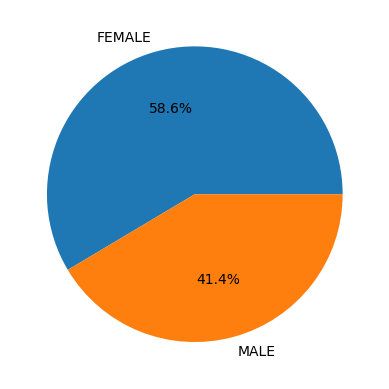

In [ ]:
plt.pie(U_GEN['ACCOUNT_ID'],labels = U_GEN['FLAG_FEMALE'], autopct ='%.1f%%')
plt.show()

Our user 58.6% is Female and 41.4 is Male

####USER by MOB

In [ ]:
for cek_MOB in sorted(df_datastat['MOB'].unique()):
  print(cek_MOB)

21.0
24.0
25.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
149.0
150.0
151.0
152.0
154.0
155.0
156.0
157.0
158.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
173.0
174.0
175.0
176.0
182.0
185.0
186.0
187.0
189.0
192.0
198.0
199.0
200.0
210.0
211.0
215.0
216.0
222.0
223.0
224.0
225.0
229.0
240.0
241.0
245.0
278.0
282.0
283.0
289.0
290.0
570.0


In [ ]:
M = df_datastat['MOB']

In [ ]:
df_datastat.loc [(M <=24), 'GROUP_MOB'] = '2 YEARS'
df_datastat.loc [(M >= 25), 'GROUP_MOB'] = '3 YEARS'
df_datastat.loc [(M >= 37), 'GROUP_MOB'] = '4 YEARS'
df_datastat.loc [(M >= 49), 'GROUP_MOB'] = '5 YEARS'
df_datastat.loc [(M >= 61), 'GROUP_MOB'] = '6 YEARS'
df_datastat.loc [(M >= 73), 'GROUP_MOB'] = '7 YEARS'
df_datastat.loc [(M >= 85), 'GROUP_MOB'] = '8 YEARS'
df_datastat.loc [(M >= 97), 'GROUP_MOB'] = '9 YEARS'
df_datastat.loc [(M >= 121), 'GROUP_MOB'] = '10 YEARS'
df_datastat.loc [(M >= 133), 'GROUP_MOB'] = '11 YEARS'
df_datastat.loc [(M >= 145), 'GROUP_MOB'] = '12 YEARS'
df_datastat.loc [(M >= 157), 'GROUP_MOB'] = '13 YEARS'
df_datastat.loc [(M >= 169), 'GROUP_MOB'] = '14 YEARS'
df_datastat.loc [(M >= 181), 'GROUP_MOB'] = '15 YEARS'
df_datastat.loc [(M >= 193), 'GROUP_MOB'] = '+ 16 YEARS'

In [ ]:
df_datastat['GROUP_MOB'].value_counts()

10 YEARS      37165
9 YEARS       25861
8 YEARS       14329
7 YEARS       13071
6 YEARS        8715
5 YEARS        4847
4 YEARS        2893
11 YEARS        243
3 YEARS         195
12 YEARS         98
13 YEARS         80
+ 16 YEARS       76
14 YEARS         49
15 YEARS         31
2 YEARS           5
Name: GROUP_MOB, dtype: int64

In [ ]:
U_MOB = df_datastat.groupby('GROUP_MOB')['ACCOUNT_ID'].count()
U_MOB = U_MOB.reset_index()
U_MOB

,GROUP_MOB,ACCOUNT_ID
0,+ 16 YEARS,76
1,10 YEARS,37165
2,11 YEARS,243
3,12 YEARS,98
4,13 YEARS,80
5,14 YEARS,49
6,15 YEARS,31
7,2 YEARS,5
8,3 YEARS,195
9,4 YEARS,2893


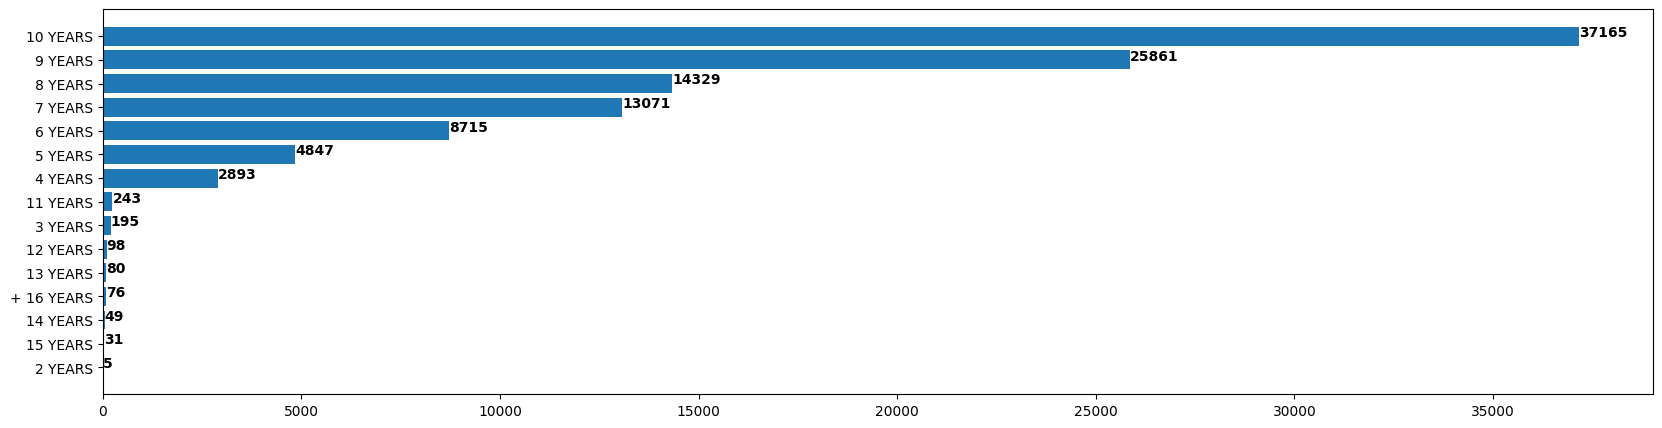

In [ ]:
fig = plt.figure(figsize =(20, 5))

K = U_MOB.copy()

K.sort_values('ACCOUNT_ID', ascending=True, inplace=True)
x = K['GROUP_MOB']
y = K['ACCOUNT_ID']

plt.barh(x, y)

#To show the data labels
for a, d in enumerate(y):
    vmil = round(d)
    plt.text(d, a, str(vmil), fontweight='bold')

plt.show()

by MOB grup, our customer most are 10 years until 4 years using our credit cards

####3.How much total sales have been generated in Revoshop (6Month)?

In [ ]:
df_datastat['TOTAL_SALES_L6M'].sum()

56639218.9

Total sales over the past last 6 month is 57.411.090 USD

####4.How many sales were made in response the promo last 6 month?

In [ ]:
df_datastat['TOTAL_PROMO_SALES_L6M'].sum()

35208915.89999999

Total sales promo last 6 month is 35.691.264 USD

####5.What percentage of total sales at Revoshop is attributed to the Promo? (6month)

In [ ]:
#6 Month

(df_datastat['TOTAL_PROMO_SALES_L6M'].sum()/df_datastat['TOTAL_SALES_L6M'].sum())*100


62.16349127653664

In [ ]:
#Lifetime

(df_datastat['TOTAL_PROMO_SALES_LTM'].sum()/df_datastat['TOTAL_SALES_LTM'].sum())*100

58.88067926930955

by 6 month the percentage sales attributed by promo is 62%
by LTM the percentage is 58%
The conclusion is by 6 month ot lifetime the users sensitive with Promo

####6.What is the average number of transactions per customer in TLM and L6M?

In [ ]:
df_datastat['TXN_CNT_L6M'].sum() / df_datastat['ACCOUNT_ID'].nunique()

4.524484943060432

In [ ]:
df_datastat['TXN_CNT_L6M'].mean()

4.524484943060432

In [ ]:
df_datastat['TXN_CNT_LTM'].mean()

20.158074643779376

In [ ]:
df_datastat['TXN_CNT_LTM'].sum() / df_datastat['ACCOUNT_ID'].nunique()

20.158074643779376

the average number of transactions per customer in TLM isd 20 and L6M is 4

####7.Total cost of the promotion over the past 6 month?

In [ ]:
df_datastat['PROMO_TXN_CNT_L6M'].sum()*1.5

456100.5

####8.Total revenue generated by the promo L6M?

In [ ]:
df_datastat['TOTAL_PROMO_SALES_L6M'].sum()*0.024

845013.9815999998

####9.How many customers ar considered promo - sensitive?


In [ ]:
df_datastat[df_datastat['Status_L6M']== 'Sensitive'].nunique()

ACCOUNT_ID               78241
MERCHANT_NAME                1
AVG_TXN_AMT_L6M            946
AVG_TXN_AMT_LTM           2130
AVG_PROMO_TXN_AMT_L6M      585
AVG_PROMO_TXN_AMT_LTM       74
TXN_CNT_L6M                 17
TXN_CNT_LTM                 85
PROMO_TXN_CNT_L6M           10
PROMO_TXN_CNT_LTM           36
LAST_TXN_DAY                27
CNT_PROMO_L6M               21
CNT_PROMO_L12M              59
CUST_VALUE_GROUP             5
MAPP_ACTIVE_GROUP            3
MOB                        167
FLAG_FEMALE                  2
PROMO_CHANNEL                2
BIRTH_DATE                6466
TOTAL_SALES_L6M           2439
TOTAL_SALES_LTM          10038
TOTAL_PROMO_SALES_L6M     1457
TOTAL_PROMO_SALES_LTM      352
PROMO_SENSITIF_L6M        7332
Status_L6M                   1
PROMO_SENSITIF_LTM       18120
Status_LTM                   2
AGE                         49
GROUP_AGE_GEN                4
GROUP_MOB                   15
dtype: int64

In [ ]:
df_datastat[df_datastat['Status_LTM']== 'Sensitive'].nunique()

ACCOUNT_ID               73806
MERCHANT_NAME                1
AVG_TXN_AMT_L6M            897
AVG_TXN_AMT_LTM           1945
AVG_PROMO_TXN_AMT_L6M      558
AVG_PROMO_TXN_AMT_LTM       75
TXN_CNT_L6M                 17
TXN_CNT_LTM                 72
PROMO_TXN_CNT_L6M           10
PROMO_TXN_CNT_LTM           30
LAST_TXN_DAY                26
CNT_PROMO_L6M               19
CNT_PROMO_L12M              50
CUST_VALUE_GROUP             5
MAPP_ACTIVE_GROUP            3
MOB                        130
FLAG_FEMALE                  2
PROMO_CHANNEL                2
BIRTH_DATE                6419
TOTAL_SALES_L6M           2349
TOTAL_SALES_LTM           9222
TOTAL_PROMO_SALES_L6M     1379
TOTAL_PROMO_SALES_LTM      346
PROMO_SENSITIF_L6M        7739
Status_L6M                   2
PROMO_SENSITIF_LTM       15599
Status_LTM                   1
AGE                         49
GROUP_AGE_GEN                4
GROUP_MOB                   14
dtype: int64

for user who has sensitive for last 6 month 78241
for user who has sensitive for lifetime 73806

##TRENDS

###is there any difference in transaction behavior and promo sensitivty between active and inactive customer past 6 months?

In [ ]:
df_behav = df_datastat[['MAPP_ACTIVE_GROUP','PROMO_SENSITIF_L6M','Status_L6M','AVG_TXN_AMT_L6M','TXN_CNT_L6M']]
df_behav.head(20)

,MAPP_ACTIVE_GROUP,PROMO_SENSITIF_L6M,Status_L6M,AVG_TXN_AMT_L6M,TXN_CNT_L6M
0,X,37.0,Not Sensitive,216.0,5.0
1,X,65.1,Sensitive,143.3,3.0
2,X,76.0,Sensitive,263.3,4.0
3,X,77.3,Sensitive,235.6,8.0
4,X,79.6,Sensitive,98.0,5.0
5,X,58.1,Sensitive,120.0,7.0
6,X,65.1,Sensitive,213.8,13.0
7,X,17.5,Not Sensitive,195.2,6.0
8,X,72.3,Sensitive,108.6,7.0
9,X,33.3,Not Sensitive,250.0,3.0


In [ ]:
df_behav_pivot = df_behav.pivot_table (index = 'MAPP_ACTIVE_GROUP', columns= 'Status_L6M', values= 'TXN_CNT_L6M', aggfunc ='sum')
df_behav_pivot = df_behav_pivot.reset_index()
df_behav_pivot.head()

Status_L6M,MAPP_ACTIVE_GROUP,Not Sensitive,Sensitive
0,X,120552.0,334122.0
1,Y,7717.0,22206.0
2,Z,1015.0,1485.0


['MAPP_ACTIVE_GROUP', 'Not Sensitive', 'Sensitive']


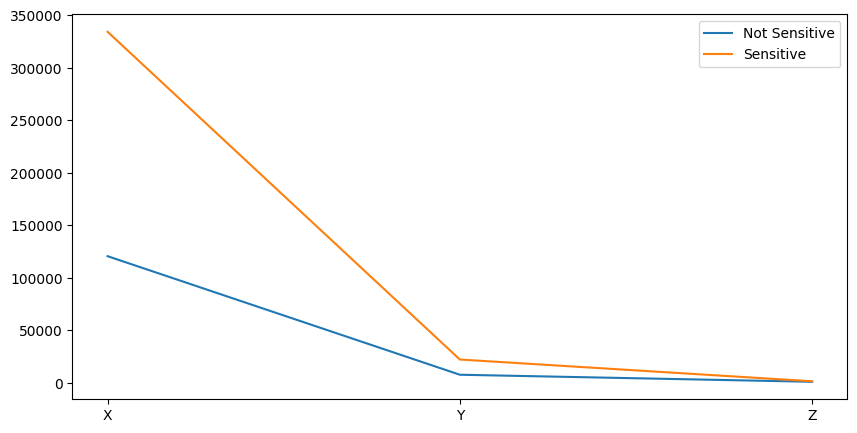

In [ ]:
plt.figure(figsize =(10, 5))
axis = df_behav_pivot.columns.tolist()
print(axis)

for x in axis[1:]:
  plt.plot(df_behav_pivot['MAPP_ACTIVE_GROUP'], df_behav_pivot[x])

plt.xticks(rotation = 0)
plt.legend(df_behav_pivot.iloc[:,1:],loc = 1)

plt.show()

In [ ]:
df_behav_pivot = df_behav.pivot_table (index = 'MAPP_ACTIVE_GROUP', columns= 'Status_L6M', values= 'AVG_TXN_AMT_L6M', aggfunc ='sum')
df_behav_pivot = df_behav_pivot.reset_index()
df_behav_pivot.head()

Status_L6M,MAPP_ACTIVE_GROUP,Not Sensitive,Sensitive
0,X,3494607.0,9188082.8
1,Y,239277.3,661607.2
2,Z,25818.1,41317.3


['MAPP_ACTIVE_GROUP', 'Not Sensitive', 'Sensitive']


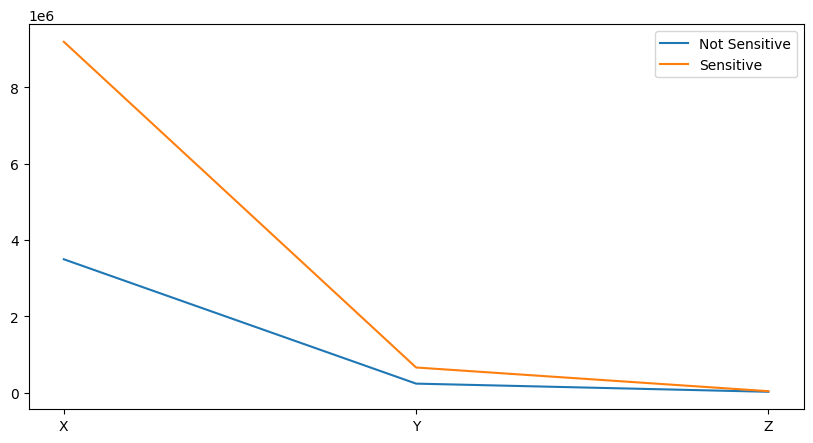

In [ ]:
plt.figure(figsize =(10, 5))
axis = df_behav_pivot.columns.tolist()
print(axis)

for x in axis[1:]:
  plt.plot(df_behav_pivot['MAPP_ACTIVE_GROUP'], df_behav_pivot[x])

plt.xticks(rotation = 0)
plt.legend(df_behav_pivot.iloc[:,1:],loc = 1)

plt.show()

INSIGHT =

by MAPP Grup, grup X which mean High Activity on Mobile very sensitive with promo, on the other hand grup Y and Z sensitive level is less than grup X, the pattern for not sensitive is same with sensitivie. The grup high activity more sensitive with promo

###Is Difference in transac behavior and promo sensitivity between high value and lower value customer in past 6 months?

In [ ]:
df_behav1 = df_datastat[['CUST_VALUE_GROUP','PROMO_SENSITIF_L6M','Status_L6M','AVG_TXN_AMT_L6M','TXN_CNT_L6M']]
df_behav1.head(20)

,CUST_VALUE_GROUP,PROMO_SENSITIF_L6M,Status_L6M,AVG_TXN_AMT_L6M,TXN_CNT_L6M
0,A,37.0,Not Sensitive,216.0,5.0
1,A,65.1,Sensitive,143.3,3.0
2,A,76.0,Sensitive,263.3,4.0
3,A,77.3,Sensitive,235.6,8.0
4,A,79.6,Sensitive,98.0,5.0
5,A,58.1,Sensitive,120.0,7.0
6,A,65.1,Sensitive,213.8,13.0
7,A,17.5,Not Sensitive,195.2,6.0
8,A,72.3,Sensitive,108.6,7.0
9,A,33.3,Not Sensitive,250.0,3.0


In [ ]:
df_behav1_pivot = df_behav1.pivot_table (index = 'CUST_VALUE_GROUP', columns= 'Status_L6M', values= 'TXN_CNT_L6M', aggfunc ='sum')
df_behav1_pivot = df_behav1_pivot.reset_index()
df_behav1_pivot.head()

Status_L6M,CUST_VALUE_GROUP,Not Sensitive,Sensitive
0,A,16934.0,52313.0
1,B,19550.0,54483.0
2,C,21155.0,59234.0
3,D,14147.0,40985.0
4,E,57498.0,150798.0


['CUST_VALUE_GROUP', 'Not Sensitive', 'Sensitive']


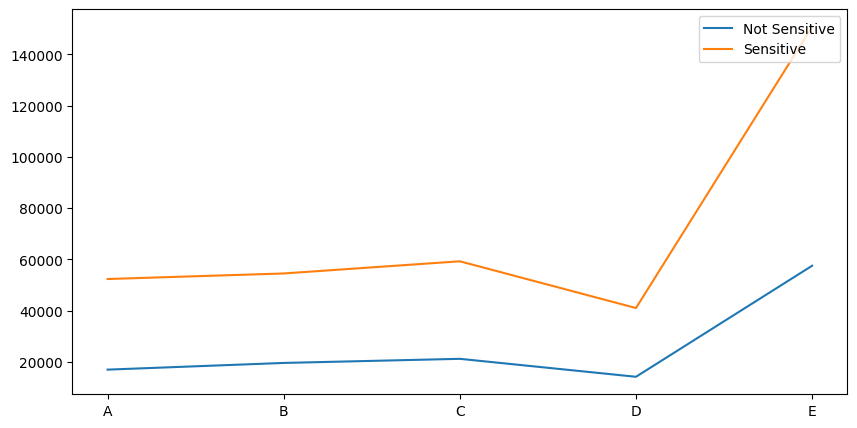

In [ ]:
plt.figure(figsize =(10, 5))
axis = df_behav1_pivot.columns.tolist()
print(axis)

for x in axis[1:]:
  plt.plot(df_behav1_pivot['CUST_VALUE_GROUP'], df_behav1_pivot[x])

plt.xticks(rotation = 0)
plt.legend(df_behav1_pivot.iloc[:,1:],loc = 1)

plt.show()

In [ ]:
df_behav1_pivot = df_behav1.pivot_table (index = 'CUST_VALUE_GROUP', columns= 'Status_L6M', values= 'AVG_TXN_AMT_L6M', aggfunc ='sum')
df_behav1_pivot = df_behav1_pivot.reset_index()
df_behav1_pivot.head()

Status_L6M,CUST_VALUE_GROUP,Not Sensitive,Sensitive
0,A,596228.7,1777703.9
1,B,595170.9,1629812.5
2,C,629722.6,1598278.4
3,D,409745.6,1107777.0
4,E,1528834.6,3777435.5


['CUST_VALUE_GROUP', 'Not Sensitive', 'Sensitive']


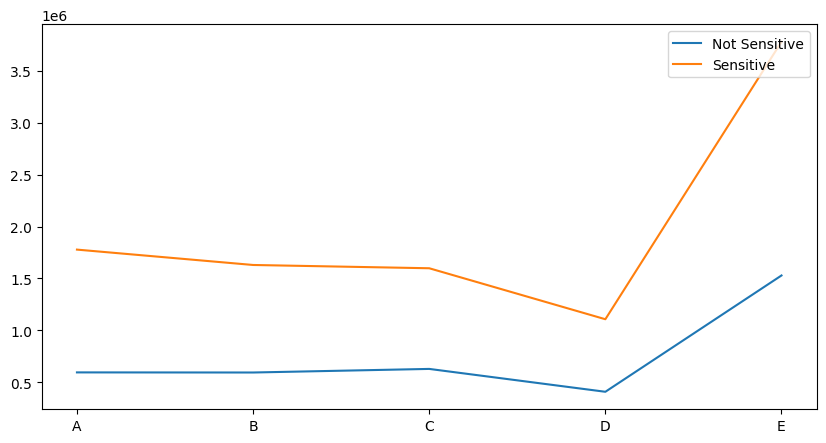

In [ ]:
plt.figure(figsize =(10, 5))
axis = df_behav1_pivot.columns.tolist()
print(axis)

for x in axis[1:]:
  plt.plot(df_behav1_pivot['CUST_VALUE_GROUP'], df_behav1_pivot[x])

plt.xticks(rotation = 0)
plt.legend(df_behav1_pivot.iloc[:,1:],loc = 1)

plt.show()

By grup customer value, grup E is the highest for sensitive level, grup A and B have same level the transacation with promo is around 5000 usd. but grup D is has lower sensitive level than another group. in the other hand, the pattern for not sensitive is same. so we can focus to give promo for group E, A, B and C.  

###is there a relationship between increasing the number of email and SMS and improved sales performance?

In [ ]:
df_datastat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

In [ ]:
U_PC = df_datastat.groupby('PROMO_CHANNEL')['ACCOUNT_ID'].count()
U_PC = U_PC.reset_index()
U_PC

,PROMO_CHANNEL,ACCOUNT_ID
0,EMAIL,32359
1,SMS,75299


In [ ]:
U_PC1 = df_datastat.groupby('PROMO_CHANNEL')['TOTAL_SALES_L6M'].sum()
U_PC1 = U_PC1.reset_index()
U_PC1

,PROMO_CHANNEL,TOTAL_SALES_L6M
0,EMAIL,16913579.0
1,SMS,39725639.9


In [ ]:
df_behav2 = df_datastat[['PROMO_CHANNEL','TOTAL_SALES_LTM','ACCOUNT_ID','GROUP_MOB']]
df_behav2.head(20)

,PROMO_CHANNEL,TOTAL_SALES_LTM,ACCOUNT_ID,GROUP_MOB
0,SMS,4221.0,100000004,10 YEARS
1,SMS,2510.2,100000008,9 YEARS
2,SMS,2912.4,100000012,8 YEARS
3,EMAIL,5670.0,100000014,8 YEARS
4,SMS,3410.0,100000015,10 YEARS
5,EMAIL,2228.6,100000024,7 YEARS
6,EMAIL,7659.0,100000027,6 YEARS
7,EMAIL,2961.2,100000028,6 YEARS
8,SMS,1971.0,100000030,6 YEARS
9,SMS,2680.6,100000031,9 YEARS


In [ ]:
df_behav2_pivot = df_behav2.pivot_table (index = 'GROUP_MOB', columns = 'PROMO_CHANNEL',values= 'TOTAL_SALES_LTM' , aggfunc = 'sum')
df_behav2_pivot.sort_values('GROUP_MOB', ascending=False, inplace=False)
df_behav2_pivot = df_behav2_pivot.reset_index()
df_behav2_pivot.head(15)

PROMO_CHANNEL,GROUP_MOB,EMAIL,SMS
0,+ 16 YEARS,98330.5,276736.2
1,10 YEARS,26107178.3,60431027.3
2,11 YEARS,708001.9,902012.7
3,12 YEARS,136134.0,343420.5
4,13 YEARS,133552.4,275120.0
5,14 YEARS,58659.9,160677.6
6,15 YEARS,34252.0,78962.7
7,2 YEARS,2520.0,6300.0
8,3 YEARS,49981.6,165726.7
9,4 YEARS,989623.1,2254619.4


['GROUP_MOB', 'EMAIL', 'SMS']


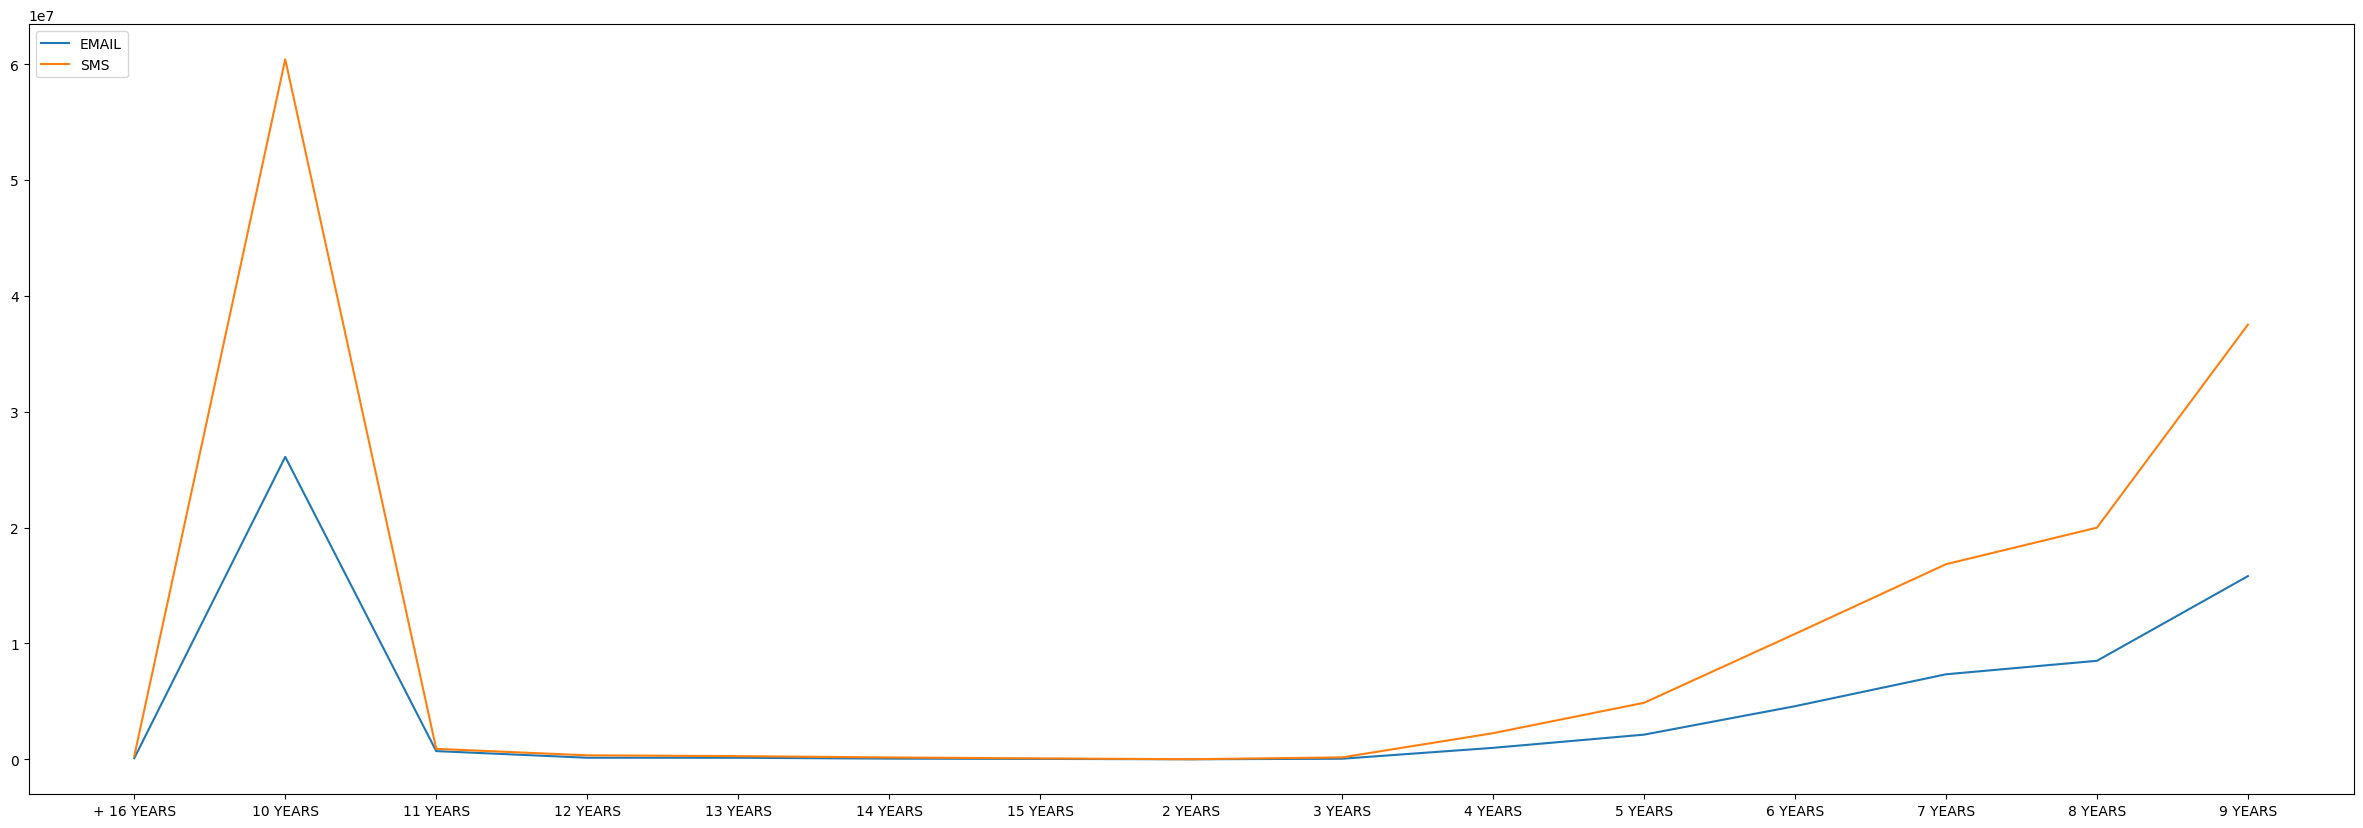

In [ ]:
plt.figure(figsize =(30, 10))
axis = df_behav2_pivot.columns.tolist()
print(axis)

for x in axis[1:]:
  plt.plot(df_behav2_pivot['GROUP_MOB'], df_behav2_pivot[x])

plt.xticks(rotation = 0)
plt.legend(df_behav2_pivot.iloc[:,1:],loc = 2)

plt.show()

INSIGHT =

the pattern indicate SMS and Email have same pattern in 16 years group MOB untill 9 years grup MOB

##CUSTOMER SEGMENTATION

In [ ]:
df_segment = df_datastat.copy()
df_segment.head()

,ACCOUNT_ID,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,...,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_L6M,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_L6M,Status_L6M,PROMO_SENSITIF_LTM,Status_LTM,AGE,GROUP_AGE_GEN,GROUP_MOB
0,100000004,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,...,4221.0,400.0,1750.0,37.0,Not Sensitive,41.5,Not Sensitive,47.0,GEN X,10 YEARS
1,100000008,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,...,2510.2,280.0,1500.0,65.1,Sensitive,59.8,Sensitive,31.0,MILLENIALS,9 YEARS
2,100000012,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,...,2912.4,800.0,1160.0,76.0,Sensitive,39.8,Not Sensitive,53.0,GEN X,8 YEARS
3,100000014,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,...,5670.0,1457.4,3900.0,77.3,Sensitive,68.8,Sensitive,39.0,MILLENIALS,8 YEARS
4,100000015,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,...,3410.0,390.0,1890.0,79.6,Sensitive,55.4,Sensitive,33.0,MILLENIALS,10 YEARS


In [ ]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MERCHANT_NAME          107658 non-null  object        
 2   AVG_TXN_AMT_L6M        107658 non-null  float64       
 3   AVG_TXN_AMT_LTM        107658 non-null  float64       
 4   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 6   TXN_CNT_L6M            107658 non-null  float64       
 7   TXN_CNT_LTM            107658 non-null  float64       
 8   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 9   PROMO_TXN_CNT_LTM      107658 non-null  float64       
 10  LAST_TXN_DAY           107658 non-null  float64       
 11  CNT_PROMO_L6M          107658 non-null  float64       
 12  CNT_PROMO_L12M         107658 non-null  floa

##RFM METRICS

we decide to use RFM Segmentation because we want to separate customer by last transaction each customer, frequency customer for transaction using promo with credit cards and by total purchased customer by promo.

the varible, we use last_txn_day to know last transaction refers to recency
promo txn count for lifetime to know all transaction with promo refers to frequency
last, total promo sales lifetime to know all amount transaction purchased with promo refers to monetary

In [ ]:
rfm_segment = df_segment[['ACCOUNT_ID', 'LAST_TXN_DAY','PROMO_TXN_CNT_LTM','TOTAL_PROMO_SALES_LTM']].copy()
rfm_segment = rfm_segment.set_index(['ACCOUNT_ID'])

rfm_segment.columns = ['recency','frequency','monetary']

rfm_segment.head()

,recency,frequency,monetary
ACCOUNT_ID,,,
100000004,15.0,7.0,1750.0
100000008,20.0,10.0,1500.0
100000012,16.0,4.0,1160.0
100000014,20.0,13.0,3900.0
100000015,25.0,21.0,1890.0


In [ ]:
pd.qcut(rfm_segment['recency'], q = 5)

ACCOUNT_ID
100000004    (1.999, 16.0]
100000008     (19.0, 21.0]
100000012    (1.999, 16.0]
100000014     (19.0, 21.0]
100000015     (21.0, 28.0]
                 ...      
101059832    (1.999, 16.0]
101059843    (1.999, 16.0]
101059857     (18.0, 19.0]
101059860    (1.999, 16.0]
101059866    (1.999, 16.0]
Name: recency, Length: 107658, dtype: category
Categories (5, interval[float64, right]): [(1.999, 16.0] < (16.0, 18.0] < (18.0, 19.0] <
                                           (19.0, 21.0] < (21.0, 28.0]]

In [ ]:
pd.qcut(rfm_segment['recency'], q = 5).value_counts()

(16.0, 18.0]     32807
(1.999, 16.0]    28451
(21.0, 28.0]     21277
(19.0, 21.0]     14234
(18.0, 19.0]     10889
Name: recency, dtype: int64

In [ ]:
pd.qcut(rfm_segment['frequency'], q = 5).value_counts()

(0.999, 7.0]    28929
(7.0, 9.0]      23614
(13.0, 46.0]    21032
(9.0, 11.0]     20780
(11.0, 13.0]    13303
Name: frequency, dtype: int64

In [ ]:
pd.qcut(rfm_segment['monetary'], q = 5).value_counts()

(880.0, 1200.0]      25869
(9.599, 600.0]       24960
(1680.0, 25950.0]    21071
(600.0, 880.0]       18318
(1200.0, 1680.0]     17440
Name: monetary, dtype: int64

In [ ]:
# Create RFM score
rfm_segment['r_score'] = pd.qcut(rfm_segment['recency'], q = 5, labels = ['5','4','3','2','1'])
rfm_segment['f_score'] = pd.qcut(rfm_segment['frequency'], q = 5, labels = ['1','2','3','4','5'])
rfm_segment['m_score'] = pd.qcut(rfm_segment['monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm_segment['rfm_score'] = rfm_segment['r_score'].astype(str) + rfm_segment['f_score'].astype(str) + rfm_segment['m_score'].astype(str)
rfm_segment.tail()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
ACCOUNT_ID,,,,,,,
101059832,4.0,5.0,500.0,5,1,1,511
101059843,8.0,5.0,1000.0,5,1,3,513
101059857,19.0,12.0,840.0,3,4,2,342
101059860,16.0,10.0,2000.0,5,3,5,535
101059866,16.0,16.0,800.0,5,5,2,552


In [ ]:
rfm_segment['rfm_score'].value_counts()

511    5341
411    5016
455    2692
155    2664
433    2398
       ... 
241     131
215     129
251     124
351      65
151      57
Name: rfm_score, Length: 125, dtype: int64

Based on RFM Segment , the biggest group is 511 score, second group is 411, which is good ini recency but worst in frequency and monetary.

##RFM SCORE MAPPING SEGMENTATION


we can grouping RFM Score by this excel
https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664


In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_group = pd.read_csv(GSHEET_URL_CSV)

In [ ]:
rfm_group['rfm_score'] = rfm_group['rfm_score'].astype(str)
rfm_group.head()

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
1,554,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,544,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,545,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...


In [ ]:
rfm_group ['segment'].value_counts()

Potential Loyalist             24
At Risk                        22
Promising                      16
Hibernating                    14
Loyal Customers                 8
Customers Needing Attention     8
Can’t Lose Them                 8
Champions                       7
Recent Customers                7
Lost                            6
About To Sleep                  5
Name: segment, dtype: int64

Customer will be divided by 11 group based on rfm_score

DATA DICTIONARY RFM SEGMENTATION


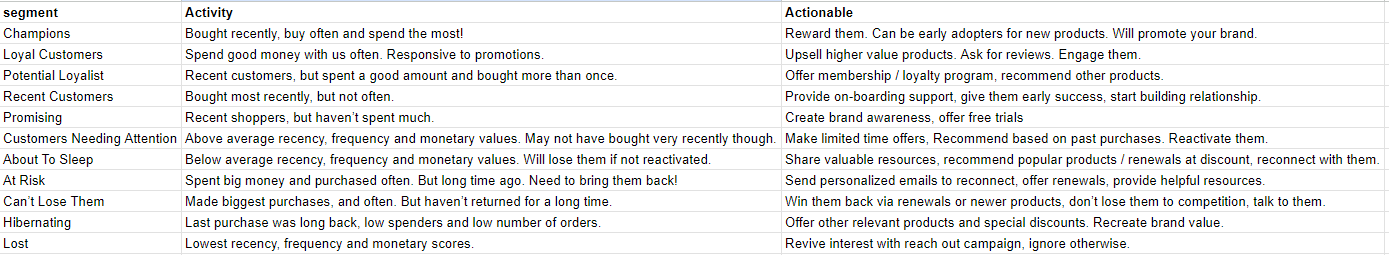


In [ ]:
rfm_segmentgrup = rfm_segment.merge(rfm_group, how = 'left', left_on = 'rfm_score', right_on = 'rfm_score')
rfm_segmentgrup.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,15.0,7.0,1750.0,5,1,5,515,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
1,20.0,10.0,1500.0,2,3,4,234,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
2,16.0,4.0,1160.0,5,1,3,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,20.0,13.0,3900.0,2,4,5,245,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
4,25.0,21.0,1890.0,1,5,5,155,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."


In [ ]:
rfm_segmentgrup ['segment'].value_counts()

Recent Customers               19135
Potential Loyalist             18354
At Risk                        14698
Promising                      12479
Hibernating                     9898
Champions                       9536
Can’t Lose Them                 6690
Loyal Customers                 5397
Customers Needing Attention     4983
Lost                            4024
About To Sleep                  2464
Name: segment, dtype: int64

In [ ]:
rfm_segmentgrup ['Actionable'].value_counts()

Provide on-boarding support, give them early success, start building relationship.                   19135
Offer membership / loyalty program, recommend other products.                                        18354
Send personalized emails to reconnect, offer renewals, provide helpful resources.                    14698
Create brand awareness, offer free trials                                                            12479
Offer other relevant products and special discounts. Recreate brand value.                            9898
Reward them. Can be early adopters for new products. Will promote your brand.                         9536
Win them back via renewals or newer products, don’t lose them to competition, talk to them.           6690
Upsell higher value products. Ask for reviews. Engage them.                                           5397
Make limited time offers, Recommend based on past purchases. Reactivate them.                         4983
Revive interest with reach out campai

In [ ]:
rfm_segmentgrup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 107657
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   recency     107658 non-null  float64 
 1   frequency   107658 non-null  float64 
 2   monetary    107658 non-null  float64 
 3   r_score     107658 non-null  category
 4   f_score     107658 non-null  category
 5   m_score     107658 non-null  category
 6   rfm_score   107658 non-null  object  
 7   segment     107658 non-null  object  
 8   Activity    107658 non-null  object  
 9   Actionable  107658 non-null  object  
dtypes: category(3), float64(3), object(4)
memory usage: 6.9+ MB


- Segment

Based on method grouping by RFM, we know most customer with group 'recent customer', it could be a 'New Customer' because the customer bought most recently.

Second place we can conclude group customers is potential loyalist, it could be 'new customer', 'existing customer', or 'promo hunter user' because they bought not only once with good amount

third place, our customer is At risk, they are 'old customer' but they are transaction long time ago

- Actionable

Based on results on group so we can make some actionable,
- we may start relationship to customer with 'special promo' or 'special treatment' like if they use 3 times promo, the customer can have a new 'bonus promo'
- we can used membership or kind of 'loyalty program promo' or we can give them recommend other products
- we can use pop-notif or doing ads by emails, phone numbers or else, other hand we can give them 'other promo' because they are existing customer but not doing transaction again

##SEGMENT HIGHER FOR SALES, TRX, REVENUE & PROPORTION SENSITIVE PROMO

In [ ]:
df_rfmgrup = df_segment.merge(rfm_segment, how = 'left', left_on = 'ACCOUNT_ID', right_on = 'ACCOUNT_ID')
df_rfmgrup.columns.tolist()

['ACCOUNT_ID',
 'MERCHANT_NAME',
 'AVG_TXN_AMT_L6M',
 'AVG_TXN_AMT_LTM',
 'AVG_PROMO_TXN_AMT_L6M',
 'AVG_PROMO_TXN_AMT_LTM',
 'TXN_CNT_L6M',
 'TXN_CNT_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM',
 'LAST_TXN_DAY',
 'CNT_PROMO_L6M',
 'CNT_PROMO_L12M',
 'CUST_VALUE_GROUP',
 'MAPP_ACTIVE_GROUP',
 'MOB',
 'FLAG_FEMALE',
 'PROMO_CHANNEL',
 'BIRTH_DATE',
 'TOTAL_SALES_L6M',
 'TOTAL_SALES_LTM',
 'TOTAL_PROMO_SALES_L6M',
 'TOTAL_PROMO_SALES_LTM',
 'PROMO_SENSITIF_L6M',
 'Status_L6M',
 'PROMO_SENSITIF_LTM',
 'Status_LTM',
 'AGE',
 'GROUP_AGE_GEN',
 'GROUP_MOB',
 'recency',
 'frequency',
 'monetary',
 'r_score',
 'f_score',
 'm_score',
 'rfm_score']

In [ ]:
df_grupping_rfm = df_rfmgrup[['ACCOUNT_ID','AVG_TXN_AMT_LTM','AVG_PROMO_TXN_AMT_LTM','TXN_CNT_LTM','TOTAL_PROMO_SALES_LTM','PROMO_SENSITIF_LTM','Status_LTM','AGE','MOB','recency','frequency','monetary','rfm_score']].copy()
df_grupping_rfm = df_grupping_rfm.set_index(['ACCOUNT_ID'])


df_grupping_rfm.head()

,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_LTM,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_LTM,Status_LTM,AGE,MOB,recency,frequency,monetary,rfm_score
ACCOUNT_ID,,,,,,,,,,,,
100000004,201.0,250.0,21.0,1750.0,41.5,Not Sensitive,47.0,123.0,15.0,7.0,1750.0,515
100000008,114.1,150.0,22.0,1500.0,59.8,Sensitive,31.0,109.0,20.0,10.0,1500.0,234
100000012,242.7,290.0,12.0,1160.0,39.8,Not Sensitive,53.0,89.0,16.0,4.0,1160.0,513
100000014,210.0,300.0,27.0,3900.0,68.8,Sensitive,39.0,86.0,20.0,13.0,3900.0,245
100000015,77.5,90.0,44.0,1890.0,55.4,Sensitive,33.0,124.0,25.0,21.0,1890.0,155


### Higher Sales by Average Amount Transaction Lifetime



In [ ]:
df_grupping_rfm1 = df_grupping_rfm.merge(rfm_group, how = 'left', left_on = 'rfm_score', right_on = 'rfm_score')
df_grupping_rfm1.head()

,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_LTM,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_LTM,Status_LTM,AGE,MOB,recency,frequency,monetary,rfm_score,segment,Activity,Actionable
0,201.0,250.0,21.0,1750.0,41.5,Not Sensitive,47.0,123.0,15.0,7.0,1750.0,515,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
1,114.1,150.0,22.0,1500.0,59.8,Sensitive,31.0,109.0,20.0,10.0,1500.0,234,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
2,242.7,290.0,12.0,1160.0,39.8,Not Sensitive,53.0,89.0,16.0,4.0,1160.0,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,210.0,300.0,27.0,3900.0,68.8,Sensitive,39.0,86.0,20.0,13.0,3900.0,245,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
4,77.5,90.0,44.0,1890.0,55.4,Sensitive,33.0,124.0,25.0,21.0,1890.0,155,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."


In [ ]:
df_avgsales = df_grupping_rfm1.groupby(['segment'])['AVG_TXN_AMT_LTM'].sum()
df_avgsales = df_avgsales.reset_index()
df_avgsales.sort_values(by = 'AVG_TXN_AMT_LTM', ascending=False)

,segment,AVG_TXN_AMT_LTM
9,Promising,1920246.9
10,Recent Customers,1794419.6
1,At Risk,1700679.6
8,Potential Loyalist,1308351.1
3,Champions,1071479.5
2,Can’t Lose Them,913776.2
5,Hibernating,905736.5
7,Loyal Customers,656622.3
4,Customers Needing Attention,595039.6
6,Lost,400389.6


we can conclude average amount trx lifetime top 3 segment are Promising, Recent Customer and At risk.

###Higher transaction frequency lifetime

In [ ]:
df_avgsales = df_grupping_rfm1.groupby(['segment'])['frequency'].sum()
df_avgsales = df_avgsales.reset_index()
df_avgsales.sort_values(by = 'frequency', ascending=False)

,segment,frequency
8,Potential Loyalist,223666.0
1,At Risk,183828.0
3,Champions,154219.0
10,Recent Customers,114207.0
9,Promising,95621.0
2,Can’t Lose Them,90689.0
5,Hibernating,84169.0
7,Loyal Customers,70359.0
4,Customers Needing Attention,53498.0
6,Lost,26762.0


we can conclude average amount trx lifetime top 3 segment are Potential Loyalist, At risk and Champions.

notes : columns frequency refer to PROMO_TXN_CNT_LTM (Number of transactions occured in the account's tenure in response to promo on merchant)

### Higher Revenue Generated

In [ ]:
df_rev_seg = df_grupping_rfm1.copy()
df_rev_seg['Revenue'] = df_rev_seg['TOTAL_PROMO_SALES_LTM']*0.024
df_rev_seg.head()

,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_LTM,TOTAL_PROMO_SALES_LTM,PROMO_SENSITIF_LTM,Status_LTM,AGE,MOB,recency,frequency,monetary,rfm_score,segment,Activity,Actionable,Revenue
0,201.0,250.0,21.0,1750.0,41.5,Not Sensitive,47.0,123.0,15.0,7.0,1750.0,515,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials",42.0
1,114.1,150.0,22.0,1500.0,59.8,Sensitive,31.0,109.0,20.0,10.0,1500.0,234,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r...",36.0
2,242.7,290.0,12.0,1160.0,39.8,Not Sensitive,53.0,89.0,16.0,4.0,1160.0,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials",27.8
3,210.0,300.0,27.0,3900.0,68.8,Sensitive,39.0,86.0,20.0,13.0,3900.0,245,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r...",93.6
4,77.5,90.0,44.0,1890.0,55.4,Sensitive,33.0,124.0,25.0,21.0,1890.0,155,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ...",45.4


In [ ]:
df_rev_seg1 = df_rev_seg.groupby(['segment'])['Revenue'].sum()
df_rev_seg1 = df_rev_seg1.reset_index()
df_rev_seg1.sort_values(by = 'Revenue', ascending=False)

,segment,Revenue
1,At Risk,595949.6
3,Champions,509521.5
9,Promising,374254.1
8,Potential Loyalist,373287.1
2,Can’t Lose Them,313999.1
7,Loyal Customers,254760.4
10,Recent Customers,231106.3
5,Hibernating,193458.3
4,Customers Needing Attention,191546.5
6,Lost,55887.6


We can conclude, top 3 segments that give high revenue are At risk, Champions and Promising.

Revenue earned from total promo sales LTM multiply by 0.024

### PROPORTION OF PROMO SENSITIVE CLIENT

In [ ]:
df_rev_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 107657
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AVG_TXN_AMT_LTM        107658 non-null  float64
 1   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64
 2   TXN_CNT_LTM            107658 non-null  float64
 3   TOTAL_PROMO_SALES_LTM  107658 non-null  float64
 4   PROMO_SENSITIF_LTM     107658 non-null  float64
 5   Status_LTM             107658 non-null  object 
 6   AGE                    107658 non-null  float64
 7   MOB                    107658 non-null  float64
 8   recency                107658 non-null  float64
 9   frequency              107658 non-null  float64
 10  monetary               107658 non-null  float64
 11  rfm_score              107658 non-null  object 
 12  segment                107658 non-null  object 
 13  Activity               107658 non-null  object 
 14  Actionable             107658 non-nu

In [ ]:
UP_50 = df_rev_seg.loc[df_rev_seg['PROMO_SENSITIF_LTM']>=50,"segment"]
UP_50.value_counts()

Potential Loyalist             13144
At Risk                        13014
Champions                       8161
Promising                       8154
Hibernating                     7322
Recent Customers                6217
Can’t Lose Them                 5365
Loyal Customers                 4857
Customers Needing Attention     4446
Lost                            1754
About To Sleep                  1372
Name: segment, dtype: int64

In [ ]:
DOWN_50 = df_rev_seg.loc[df_rev_seg['PROMO_SENSITIF_LTM'] < 50,"segment"]
DOWN_50.value_counts()

Recent Customers               12918
Potential Loyalist              5210
Promising                       4325
Hibernating                     2576
Lost                            2270
At Risk                         1684
Champions                       1375
Can’t Lose Them                 1325
About To Sleep                  1092
Loyal Customers                  540
Customers Needing Attention      537
Name: segment, dtype: int64

In [ ]:
UP_50 = df_rev_seg.loc[df_rev_seg['PROMO_SENSITIF_LTM']>=50,"segment"]
(UP_50.value_counts()/107658)*100

Potential Loyalist            12.2
At Risk                       12.1
Champions                      7.6
Promising                      7.6
Hibernating                    6.8
Recent Customers               5.8
Can’t Lose Them                5.0
Loyal Customers                4.5
Customers Needing Attention    4.1
Lost                           1.6
About To Sleep                 1.3
Name: segment, dtype: float64

In [ ]:
DOWN_50 = df_rev_seg.loc[df_rev_seg['PROMO_SENSITIF_LTM'] < 50,"segment"]
(DOWN_50.value_counts()/107658)*100

Recent Customers              12.0
Potential Loyalist             4.8
Promising                      4.0
Hibernating                    2.4
Lost                           2.1
At Risk                        1.6
Champions                      1.3
Can’t Lose Them                1.2
About To Sleep                 1.0
Loyal Customers                0.5
Customers Needing Attention    0.5
Name: segment, dtype: float64

Based on Sensitive Promo Proportion, top 3 that group who sensitive with promo are Potential Loyalist, At risk and champions. For Recent Customers         12918 have user ,Potential Loyalist have 5210 user, and Promising have 4325 user. compared with All user there are 12,2% for Potential Loyalist, 12.1% for at Risk and 7.6% for champions.

###BUSINESS RECOMMENDATION

- The objective is we want to know which user segmentation to be our promo target, in average sales, revenue, promo sensitive and transaction ‘At risk’ group always in top 3. So we can focus give this segmentation promo, because ‘At Risk’ Group is a user who spent big money and purchased often, but long time ago. They can give more revenue for company

- Second group, we suggest for ‘champions’ group. The group most in top 3 (only in average sale the group in 5th position). In Higher revenue, the group in second place and for promo sensitive in third place with 7.6% (from 107.568 user) . so if we can increase purchase promo in this group, we can increase the revenue, because there is 7% in this group who sensitive with user can bring the revenue 509521 USD